In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import io

In [15]:
#Importing datasets
crime_file = "Crimes_MASTER_2018.csv"
crime_df_18 = pd.read_csv(crime_file)
crime_df_18.head()
weather_17 = "Weather 2017.csv"
weather_18 = "Weather 2018.csv"
weather_17 = pd.read_csv(weather_17)
weather_18 = pd.read_csv(weather_18)
weather_18.head()


,dt,dt_iso,Date,city_id,city_name,lat,lon,temp,temp_min,temp_max,...,rain_today,snow_1h,snow_3h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1514764800,2018-01-01 00:00:00 +0000 UTC,2018-01-01 00:00:00,4887398,NaN,NaN,NaN,260.549984,258.15,263.15,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n
1,1514768400,2018-01-01 01:00:00 +0000 UTC,2018-01-01 01:00:00,4887398,NaN,NaN,NaN,259.750000,257.15,262.15,...,NaN,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
2,1514772000,2018-01-01 02:00:00 +0000 UTC,2018-01-01 02:00:00,4887398,NaN,NaN,NaN,258.750000,256.15,261.15,...,NaN,NaN,NaN,NaN,NaN,40,802,Clouds,scattered clouds,03n
3,1514775600,2018-01-01 03:00:00 +0000 UTC,2018-01-01 03:00:00,4887398,NaN,NaN,NaN,256.850000,254.15,260.15,...,NaN,NaN,NaN,NaN,NaN,1,800,Clear,sky is clear,01n
4,1514779200,2018-01-01 04:00:00 +0000 UTC,2018-01-01 04:00:00,4887398,NaN,NaN,NaN,256.120000,253.15,259.15,...,NaN,NaN,NaN,NaN,NaN,20,801,Clouds,few clouds,02n


In [4]:
#Pulling out date and year from the datetime column into own column
weather_17['Date '] = pd.to_datetime(weather_17['Date '])
weather_17['Month'] = pd.DatetimeIndex(weather_17['Date ']).month
weather_17['Year'] = pd.DatetimeIndex(weather_17['Date ']).year
weather_17["Month"]
weather_17.head()
#Removing columns not neccesary 
weather_17_2 = weather_17[['Date ', 'temp', 'temp_min', 'temp_max', 'weather_description', 'Month', 'Year']].copy()
#Convert tempurature from Kelvin to Fahrenheit 
def f(x):
    x = 1.8*(x-273) + 32
    return float(x)
weather_17_2["f_temp"] = weather_17_2["temp"].apply(f)     
weather_17_2
weather_17_2["f_temp_min"] = weather_17_2["temp_min"].apply(f)
weather_17_2["f_temp_max"] = weather_17_2["temp_max"].apply(f)
#New dataframe                           
df_2017 = weather_17_2[['Date ', 'f_temp', 'f_temp_min', 'f_temp_max', 'weather_description', 'Month', 'Year']].copy()
df_2017.head()

,Date,f_temp,f_temp_min,f_temp_max,weather_description,Month,Year
0,2017-01-01 00:00:00,33.908,32.27,35.87,overcast clouds,1,2017
1,2017-01-01 01:00:00,31.892,28.67,34.07,scattered clouds,1,2017
2,2017-01-01 02:00:00,30.452,28.67,32.27,sky is clear,1,2017
3,2017-01-01 03:00:00,28.346,26.87,30.47,sky is clear,1,2017
4,2017-01-01 04:00:00,26.852,25.07,28.67,sky is clear,1,2017


In [5]:
#Weather 2018 pull out date and year from datetime column into own column
weather_18['Date '] = pd.to_datetime(weather_18['Date '])
weather_18['Month'] = pd.DatetimeIndex(weather_18['Date ']).month
weather_18['Year'] = pd.DatetimeIndex(weather_18['Date ']).year
weather_18["Month"]
#Remove columns and covert Kelvin temperatures to Fahrenheit 
weather_18_2 = weather_18[['Date ', 'temp', 'temp_min', 'temp_max', 'weather_description', 'Month', 'Year']].copy()
weather_18_2["f_temp"] = weather_18_2["temp"].apply(f)     
weather_18_2["f_temp_min"] = weather_18_2["temp_min"].apply(f)
weather_18_2["f_temp_max"] = weather_18_2["temp_max"].apply(f)
#New dataframe with fahrenheit temperatures                           
df_2018 = weather_18_2[['Date ', 'f_temp', 'f_temp_min', 'f_temp_max', 'weather_description', 'Month','Year']].copy()
df_2018.head()

,Date,f_temp,f_temp_min,f_temp_max,weather_description,Month,Year
0,2018-01-01 00:00:00,9.589972,5.27,14.27,broken clouds,1,2018
1,2018-01-01 01:00:00,8.150000,3.47,12.47,sky is clear,1,2018
2,2018-01-01 02:00:00,6.350000,1.67,10.67,scattered clouds,1,2018
3,2018-01-01 03:00:00,2.930000,-1.93,8.87,sky is clear,1,2018
4,2018-01-01 04:00:00,1.616000,-3.73,7.07,few clouds,1,2018


In [14]:
weather_merge = pd.merge(df_2017, df_2018, on="Year", how="outer", suffixes=( 2017, 2018) )
#weather_merge.info()
weather_merge


,Date 2017,f_temp2017,f_temp_min2017,f_temp_max2017,weather_description2017,Month2017,Year,Date 2018,f_temp2018,f_temp_min2018,f_temp_max2018,weather_description2018,Month2018
0,2017-01-01 00:00:00,33.908000,32.27,35.87,overcast clouds,1,2017,NaT,NaN,NaN,NaN,NaN,NaN
1,2017-01-01 01:00:00,31.892000,28.67,34.07,scattered clouds,1,2017,NaT,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 02:00:00,30.452000,28.67,32.27,sky is clear,1,2017,NaT,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 03:00:00,28.346000,26.87,30.47,sky is clear,1,2017,NaT,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 04:00:00,26.852000,25.07,28.67,sky is clear,1,2017,NaT,NaN,NaN,NaN,NaN,NaN
5,2017-01-01 05:00:00,26.672000,25.07,28.67,sky is clear,1,2017,NaT,NaN,NaN,NaN,NaN,NaN
6,2017-01-01 06:00:00,25.412000,21.47,28.67,sky is clear,1,2017,NaT,NaN,NaN,NaN,NaN,NaN
7,2017-01-01 07:00:00,23.612000,19.67,26.87,sky is clear,1,2017,NaT,NaN,NaN,NaN,NaN,NaN
8,2017-01-01 08:00:00,22.874000,19.67,25.07,mist,1,2017,NaT,NaN,NaN,NaN,NaN,NaN
9,2017-01-01 09:00:00,21.470000,19.67,25.07,sky is clear,1,2017,NaT,NaN,NaN,NaN,NaN,NaN


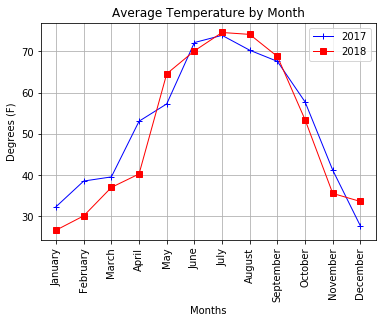

In [6]:
#Group by 2017 df
group_2017 = df_2017.groupby(['Month'])
avg_temp_2017 = group_2017["f_temp"].mean()
avg_temp_2017.to_frame()
avg_temp_2017
x_axis = np.arange(1,13,1)
labels = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October" ,"November", "December"]
y_axis_17 = [32.34, 38.56, 39.57, 53.07, 57.27, 72.15, 73.90, 70.29, 67.59, 57.76, 41.21, 27.67]

#Group 2018
group_2018 = df_2018.groupby(['Month'])
avg_temp_2018 = group_2018["f_temp"].mean()
avg_temp_2018.to_frame()
y_axis_18 = [26.65, 30.12, 37.02, 40.28, 64.57, 70.13, 74.59, 74.13, 68.77, 53.43, 35.56, 33.61]

#Avg Temp by month line graph 
weath_17, = plt.plot(x_axis, y_axis_17, marker="+",color="blue", linewidth=1, label="2017")
weath_18, = plt.plot(x_axis, y_axis_18, marker="s", color="Red", linewidth=1, label="2018")
plt.xticks(x_axis, labels, rotation='vertical')
#plt.legend(handles=[Avg_TEMP_17, Avg_TEMP_18], loc="best")
plt.title("Average Temperature by Month")
plt.xlabel("Months")
plt.ylabel("Degrees (F)")
plt.legend(handles=[weath_17, weath_18], loc="best")

plt.grid()
plt.show()


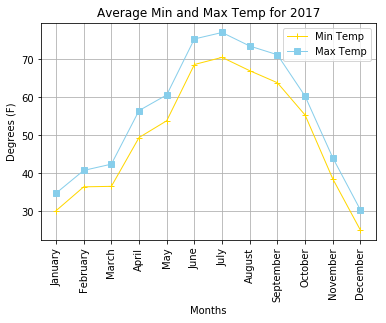

In [10]:
#Min and max for 2017
min_17 = group_2017["f_temp_min"].mean()
max_17 = group_2017["f_temp_max"].mean()

min_temp_17, = plt.plot(x_axis, min_17, marker="+",color="gold", linewidth=1, label="Min Temp" )
max_temp_17, = plt.plot(x_axis, max_17, marker="s", color="skyblue", linewidth=1, label="Max Temp")
plt.xticks(x_axis, labels, rotation='vertical')
plt.title("Average Min and Max Temp for 2017")
plt.xlabel("Months")
plt.ylabel("Degrees (F)")
plt.legend(handles=[min_temp_17, max_temp_17], loc="best")
plt.grid()
plt.show()


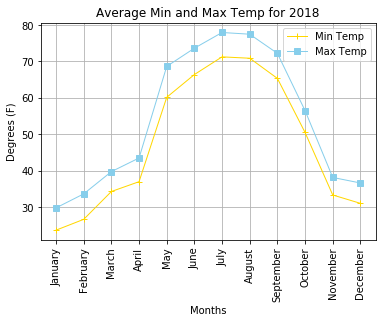

In [9]:
#Min and max for 2018
min_18 = group_2018["f_temp_min"].mean()
max_18 = group_2018["f_temp_max"].mean()

min_temp_18, = plt.plot(x_axis, min_18, marker="+",color="gold", linewidth=1, label="Min Temp" )
max_temp_18, = plt.plot(x_axis, max_18, marker="s", color="skyblue", linewidth=1, label="Max Temp")
plt.xticks(x_axis, labels, rotation='vertical')
plt.title("Average Min and Max Temp for 2018")
plt.xlabel("Months")
plt.ylabel("Degrees (F)")
plt.legend(handles=[min_temp_18, max_temp_18], loc="best")

plt.grid()
plt.show()


In [36]:
crime_df_18
crime_df_18["Date "] = pd.to_datetime(crime_df_18["Date "])
#Rename Column header 
#crime_df_18 = crime_df_18.rename(columns={'Date': 'Date '})




#Merge Crime 18 and Weather 18 dataframe 
crime_weather = pd.merge(crime_df_18, df_2018, on="Date ", how="inner", suffixes=( "_crime", "_date") )
crime_weather


,ID,Date,IUCR,Primary Type,Description,Location Description,FBI Code,X Coordinate,Y Coordinate,Year_crime,Latitude,Longitude,f_temp,f_temp_min,f_temp_max,weather_description,Month,Year_date
0,11222171,2018-02-03 09:00:00,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOSPITAL BUILDING/GROUNDS,2,NaN,NaN,2018,NaN,NaN,21.632,19.67,23.27,overcast clouds,2,2018
1,11221908,2018-02-03 09:00:00,330,ROBBERY,AGGRAVATED,CTA STATION,3,1177067.0,1882474.0,2018,41.832848,-87.625810,21.632,19.67,23.27,overcast clouds,2,2018
2,11411427,2018-08-12 10:00:00,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,17,NaN,NaN,2018,NaN,NaN,67.622,62.87,71.87,mist,8,2018
3,11411415,2018-08-12 10:00:00,051A,ASSAULT,AGGRAVATED: HANDGUN,STREET,04A,1168538.0,1856354.0,2018,41.761360,-87.657857,67.622,62.87,71.87,mist,8,2018
4,11411434,2018-08-12 10:00:00,1340,CRIMINAL DAMAGE,TO STATE SUP PROP,"SCHOOL, PUBLIC, BUILDING",14,1147025.0,1910941.0,2018,41.911591,-87.735312,67.622,62.87,71.87,mist,8,2018
5,11411482,2018-08-12 10:00:00,051A,ASSAULT,AGGRAVATED: HANDGUN,RESIDENCE,04A,1170418.0,1850212.0,2018,41.744465,-87.651145,67.622,62.87,71.87,mist,8,2018
6,11616364,2018-10-22 20:00:00,281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,2,NaN,NaN,2018,NaN,NaN,61.970,61.07,62.87,scattered clouds,10,2018
7,11537270,2018-12-16 17:00:00,460,BATTERY,SIMPLE,SPORTS ARENA/STADIUM,08B,NaN,NaN,2018,NaN,NaN,40.352,35.15,45.23,mist,12,2018
8,11537270,2018-12-16 17:00:00,460,BATTERY,SIMPLE,SPORTS ARENA/STADIUM,08B,NaN,NaN,2018,NaN,NaN,40.352,35.15,45.23,haze,12,2018
9,11537476,2018-12-16 17:00:00,031A,ROBBERY,ARMED: HANDGUN,ALLEY,3,1170512.0,1846828.0,2018,41.735177,-87.650899,40.352,35.15,45.23,mist,12,2018


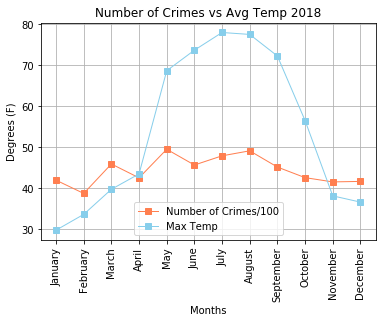

In [45]:
#Number of crimes per month 
crime_df_18
crime_df_18['Month'] = pd.DatetimeIndex(crime_df_18['Date ']).month
crime_group_18 = crime_df_18.groupby(['Month'])
crime_count = crime_group_18["Primary Type"].count()
crime_count
y_axis_crime = [(4194/100), (3871/100), (4589/100), (4251/100), (4948/100), (4564/100), (4788/100), (4910/100), (4514/100), (4256/100), (4152/100), (4164/100)]

crime_data, = plt.plot(x_axis, y_axis_crime, marker="s", color="coral", linewidth=1, label = "Number of Crimes/100")
max_temp_18, = plt.plot(x_axis, max_18, marker="s", color="skyblue", linewidth=1, label="Max Temp")
plt.xticks(x_axis, labels, rotation='vertical')
plt.title("Number of Crimes vs Avg Temp 2018")
plt.xlabel("Months")
plt.ylabel("Degrees (F)")
plt.legend(handles=[crime_data, max_temp_18], loc="best")

plt.grid()
plt.show()

